<a href="https://colab.research.google.com/github/Himangi-77/excelR-assignments/blob/main/ASSIGNMENT14_DECISIONTREE_COMPANYDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 

Sales -- Unit sales (in thousands) at each location

Competitor Price -- Price charged by competitor at each location

Income -- Community income level (in thousands of dollars)

Advertising -- Local advertising budget for company at each location (in thousands of dollars)

Population -- Population size in region (in thousands)

Price -- Price company charges for car seats at each site

Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

Age -- Average age of the local population

Education -- Education level at each location

Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [26]:
data = pd.read_csv('/content/Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [27]:
data = pd.get_dummies(data, columns=['ShelveLoc', 'Urban','US'], drop_first=True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


In [28]:
data['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [29]:
data['Sales'] = data['Sales'].apply(lambda x: 'High' if(x>=9) else 'Low')
data.Sales.value_counts()

Low     286
High    114
Name: Sales, dtype: int64

In [30]:
data = pd.get_dummies(data, columns=['Sales'], drop_first = True)
data.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Sales_Low
0,138,73,11,276,120,42,17,0,0,1,1,0
1,111,48,16,260,83,65,10,1,0,1,1,0
2,113,35,10,269,80,59,12,0,1,1,1,0
3,117,100,4,466,97,55,14,0,1,1,1,1
4,141,64,3,340,128,38,13,0,0,1,0,1


In [32]:
x = data.drop(['Sales_Low'],axis=1)
y = data['Sales_Low']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=1)

BUILDING DECISION TREE CLASSIFIER USING ENTROPY CRITERIA

In [34]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(x_train,y_train)

[Text(0.5, 0.875, 'X[7] <= 0.5\nentropy = 0.886\nsamples = 280\nvalue = [85, 195]'),
 Text(0.25, 0.625, 'X[4] <= 109.5\nentropy = 0.731\nsamples = 220\nvalue = [45, 175]'),
 Text(0.125, 0.375, 'X[5] <= 70.5\nentropy = 0.965\nsamples = 87\nvalue = [34, 53]'),
 Text(0.0625, 0.125, 'entropy = 1.0\nsamples = 69\nvalue = [34, 35]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.375, 0.375, 'X[5] <= 52.5\nentropy = 0.412\nsamples = 133\nvalue = [11, 122]'),
 Text(0.3125, 0.125, 'entropy = 0.597\nsamples = 76\nvalue = [11, 65]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 57\nvalue = [0, 57]'),
 Text(0.75, 0.625, 'X[4] <= 135.0\nentropy = 0.918\nsamples = 60\nvalue = [40, 20]'),
 Text(0.625, 0.375, 'X[2] <= 0.5\nentropy = 0.73\nsamples = 49\nvalue = [39, 10]'),
 Text(0.5625, 0.125, 'entropy = 0.996\nsamples = 13\nvalue = [6, 7]'),
 Text(0.6875, 0.125, 'entropy = 0.414\nsamples = 36\nvalue = [33, 3]'),
 Text(0.875, 0.375, 'X[6] <= 16.5\nentropy = 0.439\nsamp

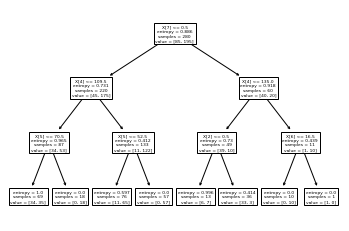

In [35]:
#Plot the Decision Tree
tree.plot_tree(model)

In [37]:
data.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes', 'Sales_Low'],
      dtype='object')

[Text(0.5, 0.875, 'ShelveLoc_Good <= 0.5\nentropy = 0.886\nsamples = 280\nvalue = [85, 195]\nclass = 1'),
 Text(0.25, 0.625, 'Price <= 109.5\nentropy = 0.731\nsamples = 220\nvalue = [45, 175]\nclass = 1'),
 Text(0.125, 0.375, 'Age <= 70.5\nentropy = 0.965\nsamples = 87\nvalue = [34, 53]\nclass = 1'),
 Text(0.0625, 0.125, 'entropy = 1.0\nsamples = 69\nvalue = [34, 35]\nclass = 1'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 18\nvalue = [0, 18]\nclass = 1'),
 Text(0.375, 0.375, 'Age <= 52.5\nentropy = 0.412\nsamples = 133\nvalue = [11, 122]\nclass = 1'),
 Text(0.3125, 0.125, 'entropy = 0.597\nsamples = 76\nvalue = [11, 65]\nclass = 1'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 57\nvalue = [0, 57]\nclass = 1'),
 Text(0.75, 0.625, 'Price <= 135.0\nentropy = 0.918\nsamples = 60\nvalue = [40, 20]\nclass = 0'),
 Text(0.625, 0.375, 'Advertising <= 0.5\nentropy = 0.73\nsamples = 49\nvalue = [39, 10]\nclass = 0'),
 Text(0.5625, 0.125, 'entropy = 0.996\nsamples = 13\nvalue = [6, 7]\ncla

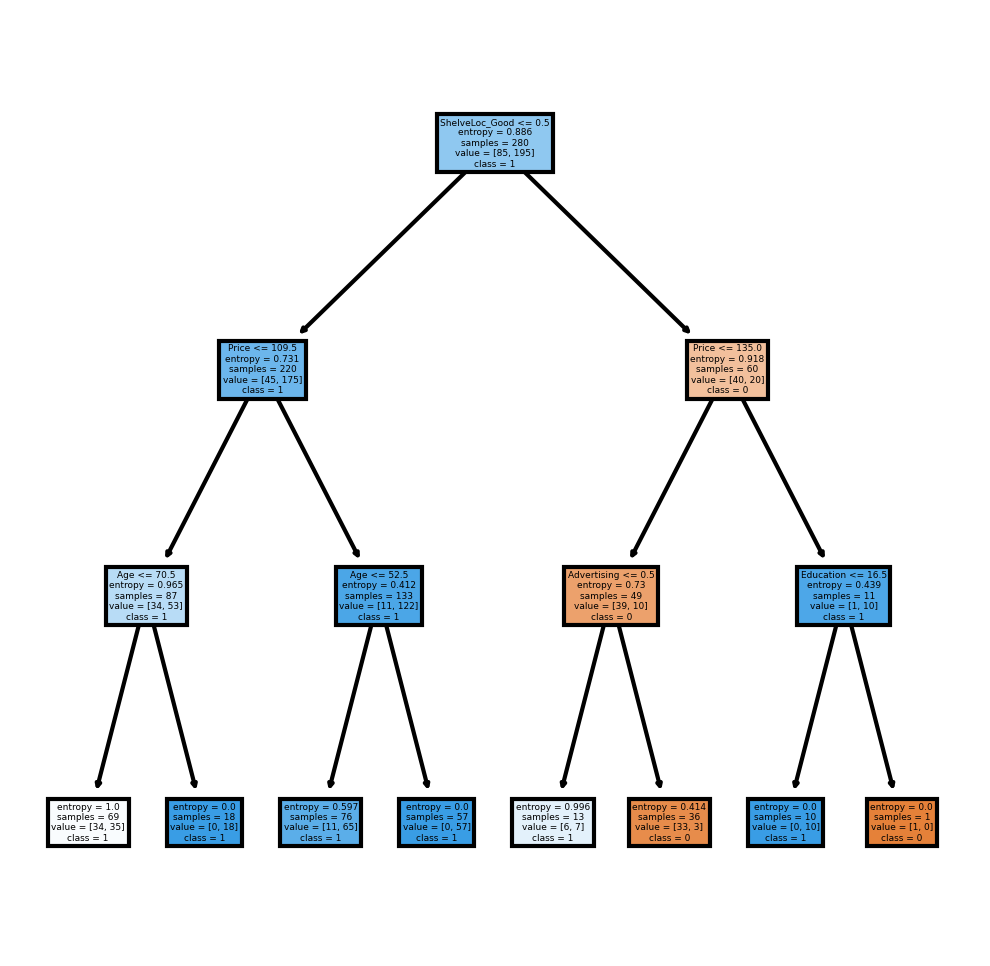

In [38]:
fn = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes']
cn = ['0','1']
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model, feature_names = fn, class_names = cn, filled=True)

In [39]:
y_pred = model.predict(x_test)

In [40]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Sales_Low,,
0,10,19
1,3,88


In [41]:
#Accuracy
np.mean(y_pred==y_test)

0.8166666666666667

DECISION TREE CLASSIFIER USING GINI CRITERIA (CART)

In [42]:
model_1 = DecisionTreeClassifier(criterion='gini', max_depth=3).fit(x_train,y_train)


In [43]:
y_pred1 = model_1.predict(x_test)

In [44]:
pd.crosstab(y_test,y_pred1)

col_0,0,1
Sales_Low,,
0,13,16
1,18,73


In [45]:
#Accuracy
np.mean(y_pred1==y_test)

0.7166666666666667

DECISION TREE REGRESSION

In [46]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,test_size = 0.33, random_state =1)
model_r = DecisionTreeRegressor()

In [47]:
model_r.fit(x_train1, y_train1)

DecisionTreeRegressor()

In [48]:
y_pred_2 = model_r.predict(x_test)

In [52]:
#Accuracy
model.score(x_test1,y_test1)

0.7954545454545454